In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sys import exit
np.seterr(divide='ignore')

{'divide': 'ignore', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [6]:
data_CL_file = 'data_CL.xlsx'
data_CL = pd.read_excel(data_CL_file, header=0)

In [59]:
data_file = 'data_summary_all.csv'
data_all = pd.read_csv(data_file)

# a little bit of pre-processing
rho_air = 1.225 # kg/m^3
l_strip = 0.1524 # mm
data_all['Cy'] = data_all.apply(lambda x: rho_air*l_strip**3*x['velocity (m/s)']**2/x['bending_stiffness'], axis=1)
data_all['theta_end'] = data_all['theta_end'].apply(lambda x: x*180/np.pi)

data = data_all[ data_all['optimal'] == True ]

data = data[ (data['theta_end'].between(0, 136)) ] # data[ (data['theta_end'] > 2.1) & (data['theta_end'] < 2.5)]]
# data = data[data['gamma'] < 0.002]
# data = data[data['porosity']==0]

data.describe()
# print(data.groupby('strip color').count())

,porosity,velocity (m/s),Cd,gamma,theta_integrated,theta_end,bending_energy,bending_stiffness,Cy
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.245435,7.505637,1.281784,0.001501,2.157093,124.933813,7.832568,0.009139,37.636585
std,0.248986,3.065548,0.367370,0.000954,0.118096,7.414032,0.905806,0.008376,16.159855
min,0.000000,2.818674,0.601937,0.000172,1.886446,109.657348,5.931138,0.000607,18.121291
25%,0.030000,4.661326,1.043140,0.000840,2.046681,117.595611,6.984768,0.002925,26.772590
50%,0.160000,7.339737,1.336871,0.001333,2.179094,125.883018,7.969782,0.005615,32.001986
75%,0.420000,9.444762,1.527383,0.001958,2.257020,131.350581,8.603940,0.014247,42.153725
max,0.680000,13.996509,1.984941,0.004402,2.321674,135.798595,9.200901,0.027900,84.341117


In [60]:
# fig, ax = plt.subplots(1, 1, figsize=(8,4))
# ax.hist(data['theta_end'], bins=int(len(data)/9), edgecolor='black')
# ax.set_title('number of experiments')
# ax.set_xlabel(r'$\theta_\mathrm{end}$')
# ax.grid(True)

# plt.savefig('histogram_thetaEnd' + '.pdf',foramt='pdf')
# plt.show()

In [61]:
# fig, ax = plt.subplots(1, 1, figsize=(8,4))
# for name, group in data.groupby(['strip color', 'porosity']):
#     color, porosity = name
#     label_color = color if color != 'clear' else 'grey'
#     ax.scatter(group['theta_end'], group['Cd'], color=label_color, label=color)
    
# # ax.legend(frameon=True).get_frame().set_facecolor('white')
# plt.show()

In [62]:
Castro_phi = np.array([0.675, 0.525, 0.45, 0.35, 0.33, 0.25, 0.18, 0.11, 0.04])
Castro_Cd = np.array([0.725, 0.925, 1.125, 1.2, 1.22, 1.32, 1.6, 1.7, 1.75])

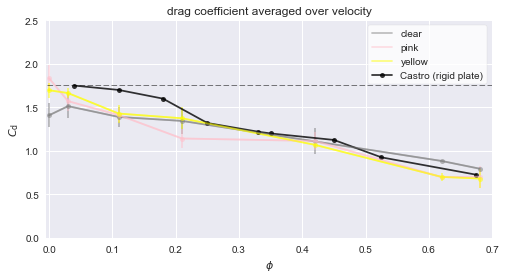

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
for color in data['strip color'].unique():
    label_color = 'grey' if color=='clear' else color
    tmp = data[data['strip color']==color]
    ax.plot(tmp['porosity'].unique(), tmp.groupby('porosity').mean()['Cd'], 
            color=label_color, label=color, alpha=0.5)
    ax.errorbar(tmp['porosity'].unique(), tmp.groupby('porosity').mean()['Cd'], 
                xerr=0, yerr=tmp.groupby('porosity').var()['Cd'].apply(lambda x: np.sqrt(x)), 
                color=label_color, label=None, marker='.', markersize=10, alpha=0.55)
    
ax.plot(Castro_phi, Castro_Cd, color='black', alpha=0.8, label='Castro (rigid plate)', marker='.', markersize=10)
ax.plot([-1, 1], [1.76, 1.76], linestyle='--', color='black', linewidth=0.5)

ax.legend(frameon=True).get_frame().set_facecolor('white')
ax.set_xlim([-0.005, 0.7])
ax.set_ylim([0, 2.5])
ax.set_xlabel('$\phi$')
ax.set_ylabel('$C_\mathrm{d}$')
ax.set_title('drag coefficient averaged over velocity')
plt.savefig('color_Cd_porosity' + '.pdf',foramt='pdf')
plt.show()

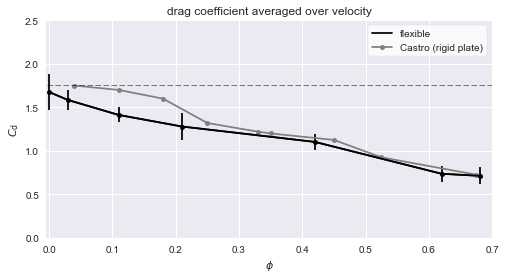

porosity
0.00    1.676169
0.03    1.584342
0.11    1.412406
0.21    1.279402
0.42    1.102340
0.62    0.736254
0.68    0.712587
Name: Cd, dtype: float64
porosity
0.00    0.206611
0.03    0.114331
0.11    0.085985
0.21    0.155531
0.42    0.092760
0.62    0.089688
0.68    0.096887
Name: Cd, dtype: float64


In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.plot(np.sort(data['porosity'].unique()), data.groupby('porosity').mean()['Cd'],
        color='black', label='flexible')
ax.errorbar(np.sort(data['porosity'].unique()), data.groupby('porosity').mean()['Cd'],
            xerr=0, yerr=data.groupby('porosity').var()['Cd'].map(np.sqrt), 
            color='black', marker='.', markersize=10, alpha=1.0, label=None)
ax.plot(Castro_phi, Castro_Cd, color='grey', alpha=1, label='Castro (rigid plate)', marker='.', markersize=10)
ax.plot([-1, 1], [1.76, 1.76], linestyle='--', color='black', linewidth=0.5)

# ax.semilogx((data['porosity'].apply(lambda x: np.divide(1,x**2)).unique()), data.groupby('porosity').mean()['Cd'],
#         color='black', label='flexible', marker='.')
# ax.errorbar((data['porosity'].apply(lambda x: np.divide(1,x**2)).unique()), data.groupby('porosity').mean()['Cd'],
#             xerr=0, yerr=data.groupby('porosity').var()['Cd'].map(np.sqrt), 
#             color='black', marker='.', markersize=10, alpha=1.0, label=None)
# ax.semilogx(1/Castro_phi**2, Castro_Cd, color='grey', alpha=1, label='Castro (rigid plate)', marker='.', markersize=10)


ax.set_xlim([-0.005, 0.7])
ax.set_ylim([0, 2.5])
ax.set_xlabel('$\phi$')
ax.set_ylabel('$C_\mathrm{d}$')
ax.set_title('drag coefficient averaged over velocity')
ax.legend(frameon=True).get_frame().set_facecolor('white')
plt.savefig('Cd_porosity' + '.pdf',foramt='pdf')
plt.show()


print(data.groupby('porosity').mean()['Cd'])
print(data.groupby('porosity').var()['Cd'].map(np.sqrt))

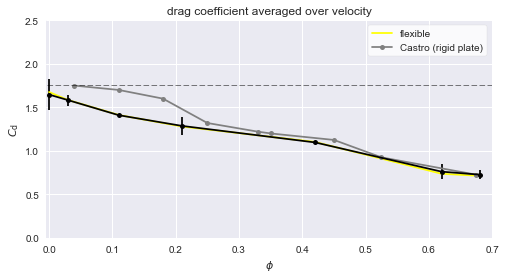

porosity
0.00    1.676169
0.03    1.584342
0.11    1.412406
0.21    1.279402
0.42    1.102340
0.62    0.736254
0.68    0.712587
Name: Cd, dtype: float64
[ 0.17732061  0.0619512   0.01595062  0.10318492  0.01999962  0.08697764
  0.0491354 ]
porosity
0.00    0.206611
0.03    0.114331
0.11    0.085985
0.21    0.155531
0.42    0.092760
0.62    0.089688
0.68    0.096887
Name: Cd, dtype: float64


In [65]:
def mean_within_strip(data, strip_color):
    data_color = data[ data['strip color']==strip_color ]
    data_color_phi = [data_color[data_color['porosity']==phi] for phi in data_color['porosity'].unique()]
    err_color = [group.mean()['Cd'] for group in data_color_phi]
    return err_color
    
ymean = np.array([mean_within_strip(data, color) for color in data['strip color'].unique()]).mean(axis=0)
ymean.mean(axis=0)
yerr = np.std([mean_within_strip(data, color) for color in data['strip color'].unique()], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.plot(np.sort(data['porosity'].unique()), data.groupby('porosity').mean()['Cd'],
        color='yellow', label='flexible')
ax.errorbar(np.sort(data['porosity'].unique()), ymean,
            xerr=0, yerr=yerr, 
            color='black', marker='.', markersize=10, alpha=1.0, label=None)
ax.plot(Castro_phi, Castro_Cd, color='grey', alpha=1, label='Castro (rigid plate)', marker='.', markersize=10)
ax.plot([-1, 1], [1.76, 1.76], linestyle='--', color='black', linewidth=0.5)

ax.set_xlim([-0.005, 0.7])
ax.set_ylim([0, 2.5])
ax.set_xlabel('$\phi$')
ax.set_ylabel('$C_\mathrm{d}$')
ax.set_title('drag coefficient averaged over velocity')
ax.legend(frameon=True).get_frame().set_facecolor('white')
plt.savefig('Cd_porosity' + '.pdf',foramt='pdf')
plt.show()

print(data.groupby('porosity').mean()['Cd'])
print(yerr)
print(data.groupby('porosity').var()['Cd'].map(np.sqrt))

In [66]:
# # Cd(velocity) grouped by strip color
# fig, ax = plt.subplots(1, 1, figsize=(8,4))
# for color in data['strip color'].unique():
#     label_color = 'grey' if color=='clear' else color
#     tmp_data = data[ data['strip color']==color]
#     ax.scatter(tmp_data['velocity (m/s)'], tmp_data['Cd'], 
#                label=color, color=label_color, marker='.', s=100)

# ax.plot([-20, 20], [1.76, 1.76], linestyle='--', color='black', linewidth=0.5)

# ax.set_xlim([0, 20])
# ax.set_ylim([0, 2.5])
# ax.legend(frameon=True).get_frame().set_facecolor('white')
# ax.set_xlabel('velocity [m/s]')
# ax.set_ylabel('$C_\mathrm{d}$')
# ax.set_title('drag coefficient vs. velocity for each strip')
# plt.savefig('color_Cd_velocity' + '.pdf',foramt='pdf')
# plt.show()

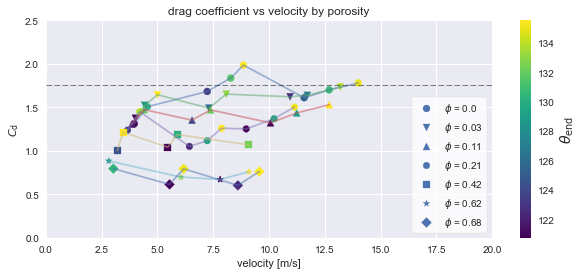

In [67]:
# Cd vs velocity grouped by porosity
fig, ax = plt.subplots(1, 1, figsize=(10,4))

marker_idx = 0
marker_list = ['o', 'v', '^', '8', 's', '*', 'D']
for porosity, group in data.groupby('porosity'):
    sc = ax.scatter(x=group['velocity (m/s)'], y=group['Cd'], c=group['theta_end'], cmap='viridis',
                   marker=marker_list[marker_idx], label=r'$\phi$ = ' + str(porosity))
    group = group.sort_values(by='velocity (m/s)')
    ax.plot(group['velocity (m/s)'], group['Cd'], alpha=0.5, label='_nolegend_')
    marker_idx = marker_idx + 1

ax.axhline(y=1.76, linestyle='--', color='black', linewidth=0.5)

ax.set_xlim([0, 20])
ax.set_ylim([0, 2.5])
ax.legend(frameon=True).get_frame().set_facecolor('white')
ax.set_xlabel('velocity [m/s]')
ax.set_ylabel('$C_\mathrm{d}$')
ax.set_title('drag coefficient vs velocity by porosity')

cbar = plt.colorbar(sc)
cbar.set_label(r'$\theta_\mathrm{{end}}$', rotation=90, fontsize=14)

plt.tight_layout
plt.savefig('porosity_Cd_velocity_deflection' + '.pdf', format='pdf')
plt.show()

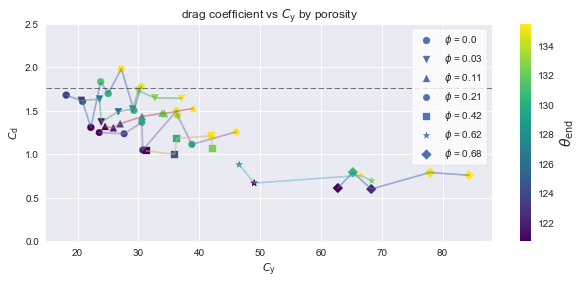

In [73]:
# Cd vs velocity grouped by porosity
fig, ax = plt.subplots(1, 1, figsize=(10,4))
marker_idx = 0
marker_list = ['o', 'v', '^', '8', 's', '*', 'D']
for porosity, group in data.groupby('porosity'):
    sc = ax.scatter(x=group['Cy'], y=group['Cd'], c=group['theta_end'], cmap='viridis',
                   marker=marker_list[marker_idx], label=r'$\phi$ = ' + str(porosity))
    group = group.sort_values(by='Cy')
    ax.plot(group['Cy'], group['Cd'], alpha=0.5, label='_nolegend_')
    marker_idx = marker_idx + 1

ax.axhline(y=1.76, linestyle='--', color='black', linewidth=0.5)

# ax.set_xlim([0, 20])
ax.set_ylim([0, 2.5])
ax.legend(frameon=True).get_frame().set_facecolor('white')
ax.set_xlabel('$C_\mathrm{y}$')
ax.set_ylabel('$C_\mathrm{d}$')
ax.set_title('drag coefficient vs $C_\mathrm{{y}}$ by porosity')

cbar = plt.colorbar(sc)
cbar.set_label(r'$\theta_\mathrm{{end}}$', rotation=90, fontsize=14)

plt.tight_layout
# plt.savefig('porosity_Cd_velocity_deflection' + '.pdf', format='pdf')
plt.show()

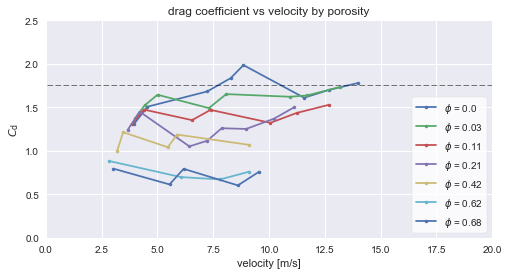

In [69]:
# Cd vs velocity grouped by porosity
fig, ax = plt.subplots(1, 1, figsize=(8,4))
porosity_data = data.groupby('porosity')
for porosity, group in porosity_data:
    group = group.sort_values(by=['velocity (m/s)'])
    ax.plot(group['velocity (m/s)'], group['Cd'], label=r'$\phi$ = ' + str(porosity), marker='.')

ax.axhline(y=1.76, linestyle='--', color='black', linewidth=0.5)

ax.set_xlim([0, 20])
ax.set_ylim([0, 2.5])
ax.legend(frameon=True).get_frame().set_facecolor('white')
ax.set_xlabel('velocity [m/s]')
ax.set_ylabel('$C_\mathrm{d}$')
ax.set_title('drag coefficient vs velocity by porosity')
plt.savefig('porosity_Cd_velocity' + '.pdf', format='pdf')
plt.show()

In [70]:
# compute delta(gamma)/gamma
# data['delta_gamma'] = 0
for color in data_all['strip color'].unique():
    for phi in data_all['porosity'].unique():
        tmp = data_all[ data_all['strip color'] == color ]
        tmp = tmp[ tmp['porosity'] == phi]
        for vel in tmp['velocity (m/s)'].unique():
            tmp_vel = tmp[ tmp['velocity (m/s)'] == vel ]
            data_index = (data['strip color'] == color) & (data['porosity'] == phi) & (data['velocity (m/s)'] == vel)
            data.loc[data_index, 'gamma_change'] = (tmp_vel['gamma'].iloc[0] + tmp_vel['gamma'].iloc[-1] 
                                                    - 2*tmp_vel['gamma'].min()) / (2*tmp_vel['gamma'].min())
data.head(n=2)

,strip color,porosity,velocity (m/s),Cd,gamma,optimal,theta_integrated,theta_end,bending_energy,bending_stiffness,Cy,gamma_change
17,clear,0.0,4.54737,1.506287,0.001468,True,2.176099,125.726510,7.951491,0.003065,29.253716,1.368810
22,clear,0.0,3.95881,1.310843,0.001364,True,1.886446,109.657348,5.931138,0.003065,22.171238,2.299178


In [ ]:
# sensitivity plots Cd vs theta_end?
grouped_min = data_all.groupby(['strip color', 'porosity', 'velocity (m/s)']).min()
grouped_max = data_all.groupby(['strip color', 'porosity', 'velocity (m/s)']).max()
grouped_median = data_all.groupby(['strip color', 'porosity', 'velocity (m/s)']).median()

# print(grouped_min.loc['pink'].loc[0.0].loc[7.227766011])

grouped_diff_gamma = (grouped_max['gamma']-grouped_min['gamma']) / grouped_median['gamma'] * 100
grouped_diff_gamma.reset_index(level=[0, 1, 2]).head(n=2)

In [ ]:
# delta Cd vs theta_end, velocity, bending energy
fig, ax = plt.subplots(2, 1, figsize=(10,15))

for color in data['strip color'].unique():
    label_color = 'grey' if color == 'clear' else color
    tmp = data[ data['strip color'] == color ]
    ax[0].scatter(tmp['theta_end'], tmp['gamma_change'], color=label_color, label=color)
#     ax[0].scatter(tmp['theta_end'], tmp['gamma'], color=label_color, label=color)
    ax[1].scatter(tmp['velocity (m/s)'], tmp['gamma_change'], color=label_color, label=color)


for i in range(0, 2):
#     ax[i].set_ylim([0, 0.005])
    ax[i].legend(frameon=True, fontsize=14).get_frame().set_facecolor('white')

ax[0].set_xlabel(r'$\theta_\mathrm{{end}}$', fontsize=14)
ax[1].set_xlabel(r'velocity (m/s)', fontsize=14)
ax[0].set_title(r'$\Delta \gamma / \gamma$ due to 10% change in $C_d$')

fig.set_tight_layout
plt.show()

In [ ]:
plt.hist(data['gamma'], bins=30)
plt.show()

In [ ]:
plt.scatter(data['porosity'], data['theta_end'])
plt.show()